# Text clustering

### Dataset: headlines.csv - mitu.co.in/dataset

In [44]:
# import
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from wordcloud import WordCloud
# from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('headlines.csv', header=None)
df.head()

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...


In [46]:
print(df[0][0])

Budget to set scene for election
 
 Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.
 
 Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.
 
 - Increase in the stamp duty threshold from Â£60,000 
  - A freeze on petrol duty 
  - An extension of tax credit scheme for poorer families 
  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chanc

### Data Preparation


In [47]:
swords = stopwords.words('english') # stopwords
swords.append('said') # since 'said' is occuring too frequently and its relatively not meaningful

In [48]:
def clean_text(sent): # cleaning the data
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    return tokens3


In [49]:
sent = "Hello friends! How are  you? I like Python Programming."

In [50]:
clean_text(sent)

['hello', 'friends', 'like', 'python', 'programming']

In [51]:
pos_tag(['like']) # pos tagging a certain word

[('like', 'IN')]

In [52]:
wnl = WordNetLemmatizer() # wordnet lemmatizer
wnl.lemmatize('like', pos='a')

'like'

In [53]:
def lemmatize(word): # lemmatizing each word after checking the pos tags for them
    tag = pos_tag([word])
    pos = 'n'
    wnl = WordNetLemmatizer()
    if tag[0][1].startswith('N'):
        pos = 'n'
    if tag[0][1].startswith('V'):
        pos = 'v'
    if tag[0][1].startswith('J'):
        pos = 'a'
    if tag[0][1].startswith('R'):
        pos = 'r'
    return(wnl.lemmatize(word, pos=pos))

In [54]:
print(lemmatize('like'))

like


In [55]:
print(lemmatize('Programming'))


Programming


In [56]:
print(lemmatize('nice'))

nice


In [57]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    tokens4 = [lemmatize(token) for token in tokens3]
    return tokens4


In [58]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

In [59]:
# Clean the cleaned data and plot the wordcloud

In [60]:
from wordcloud import WordCloud

In [61]:
# finding a system font path
from matplotlib import font_manager

# Find a system font path
font_path = font_manager.findfont('MonoLisa')

In [69]:
cleaned = df[0].apply(clean_text)

In [70]:
cleaned[:5]

0    [budget, set, scene, election, gordon, brown, ...
1    [army, chief, regiment, decision, military, ch...
2    [howard, denies, split, id, card, michael, how...
3    [observer, monitor, uk, election, minister, in...
4    [kilroy, name, election, seat, target, show, h...
Name: 0, dtype: object

In [75]:
cleaned = cleaned.values[0]

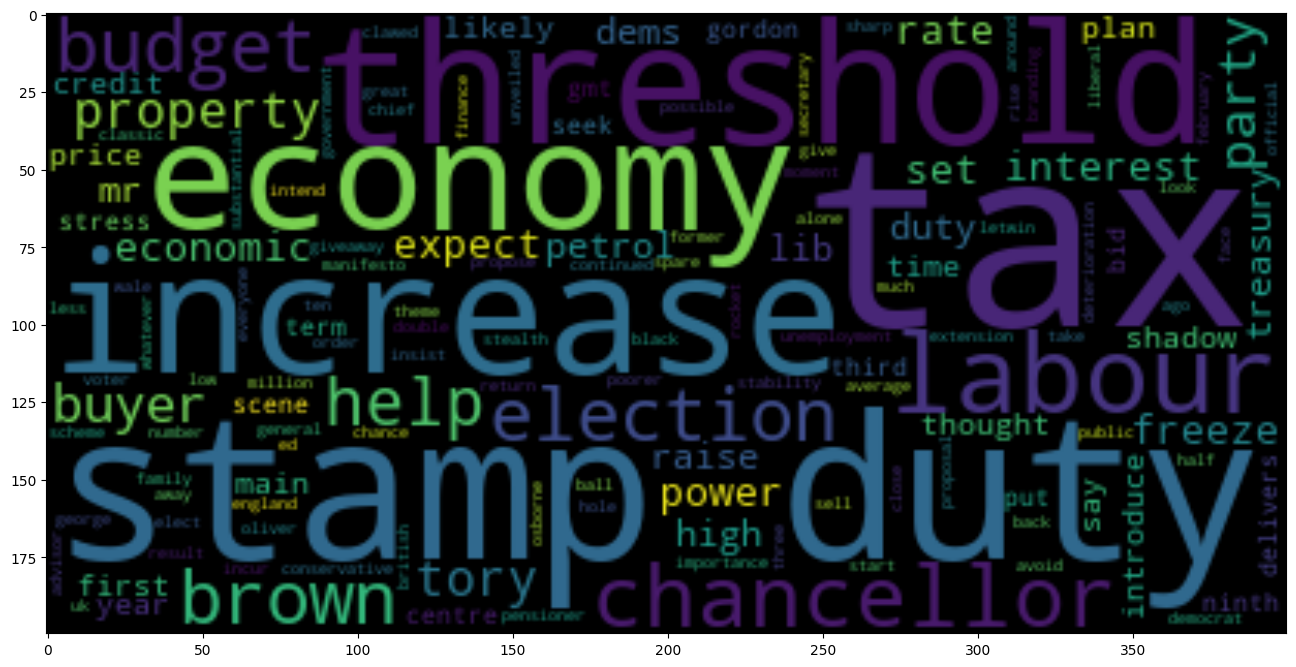

In [21]:
wcloud = WordCloud().generate(' '.join(cleaned))
plt.figure(figsize=(16, 9))
plt.imshow(wcloud, interpolation='bilinear')

### K-means Cluster Object

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer # intializing the vectorizer
tfidf = TfidfVectorizer(analyzer=clean_text)
x_new = tfidf.fit_transform(df[0])
x_new.shape

(2225, 21406)

In [108]:
x_new

<2225x21406 sparse matrix of type '<class 'numpy.float64'>'
	with 309592 stored elements in Compressed Sparse Row format>

In [107]:
from sklearn.cluster import KMeans # k means clustering
km = KMeans(random_state=0)
labels = km.fit_predict(x_new)

In [109]:
labels[:5]

array([6, 5, 6, 6, 6])

In [96]:
km.inertia_ # sum of square error

2070.5177503886725

### Elbow Method

In [97]:
# checking how the error decreases when varying the cluster count
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit_predict(x_new)
    sse.append(km.inertia_)

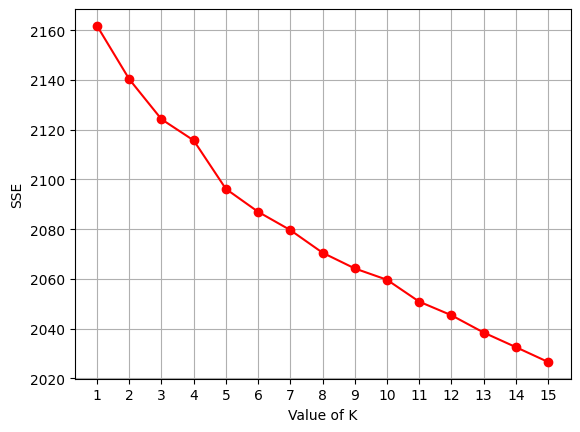

In [98]:
plt.xlabel('Value of K') # plotting the error curve
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker='o', color='r')

### Create the clusters

In [ ]:
km = KMeans(random_state=0, n_clusters=5, n_init='auto')

In [29]:
labels = km.fit_predict(x_new)

In [30]:
labels

array([4, 3, 4, ..., 3, 3, 3])

### Separate the clusters

In [31]:
zero = df[labels==0] # selecting only the articles labelled as 0 in the clusters
zero

,0
72,MPs issued with Blackberry threat\n \n MPs wil...
247,Game warnings 'must be clearer'\n \n Violent v...
300,MPs issued with Blackberry threat\n \n MPs wil...
373,UK firms 'embracing e-commerce'\n \n UK firms ...
928,Digital UK driven by net and TV\n \n The UK's ...
...,...
1820,News Corp eyes video games market\n \n News Co...
1861,Brussels raps mobile call charges\n \n The Eur...
2054,Making your office work for you\n \n Our missi...
2138,Orange colour clash set for court\n \n A row o...


In [32]:
one = df[labels==1] # selecting only the articles labelled as 1
two = df[labels==2] # only the articles labelled as 2
three = df[labels==3] # only the articles labelled as 3
four = df[labels==4] # only the articles labelled as 4


In [33]:
print(f'Cluster 0:{len(zero)}')
print(f'Cluster 1:{len(one)}')
print(f'Cluster 2:{len(two)}')
print(f'Cluster 3:{len(three)}')
print(f'Cluster 4:{len(four)}')

Cluster 0:377
Cluster 1:348
Cluster 2:520
Cluster 3:696
Cluster 4:284


### Checking for the most frequently occurring words in every cluster, to determine their context

In [110]:
from nltk import FreqDist # Technology
new = ' '.join(zero[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)


[('people', 888),
 ('also', 492),
 ('Mr', 476),
 ('technology', 469),
 ('new', 444),
 ('would', 444),
 ('could', 432),
 ('mobile', 423),
 ('music', 404),
 ('one', 377)]

In [ ]:
from nltk import FreqDist # Films/Entertainment Shows
new = ' '.join(one[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)


[('film', 671),
 ('best', 567),
 ('also', 344),
 ('year', 328),
 ('music', 312),
 ('show', 296),
 ('US', 275),
 ('one', 257),
 ('first', 230),
 ('UK', 220)]

In [36]:
from nltk import FreqDist # Sports
new = ' '.join(two[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('game', 519),
 ('England', 466),
 ('first', 442),
 ('would', 424),
 ('win', 412),
 ('last', 369),
 ('one', 347),
 ('two', 345),
 ('also', 343),
 ('time', 340)]

In [ ]:
from nltk import FreqDist # Finance/ Market
new = ' '.join(three[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('US', 912),
 ('Mr', 847),
 ('would', 763),
 ('year', 757),
 ('also', 592),
 ('government', 527),
 ('could', 457),
 ('new', 451),
 ('company', 448),
 ('market', 428)]

In [38]:
from nltk import FreqDist # UK politics
new = ' '.join(four[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('Mr', 1490),
 ('would', 815),
 ('Labour', 728),
 ('election', 547),
 ('Blair', 544),
 ('government', 505),
 ('people', 431),
 ('party', 415),
 ('Brown', 375),
 ('also', 331)]

### wordclouds

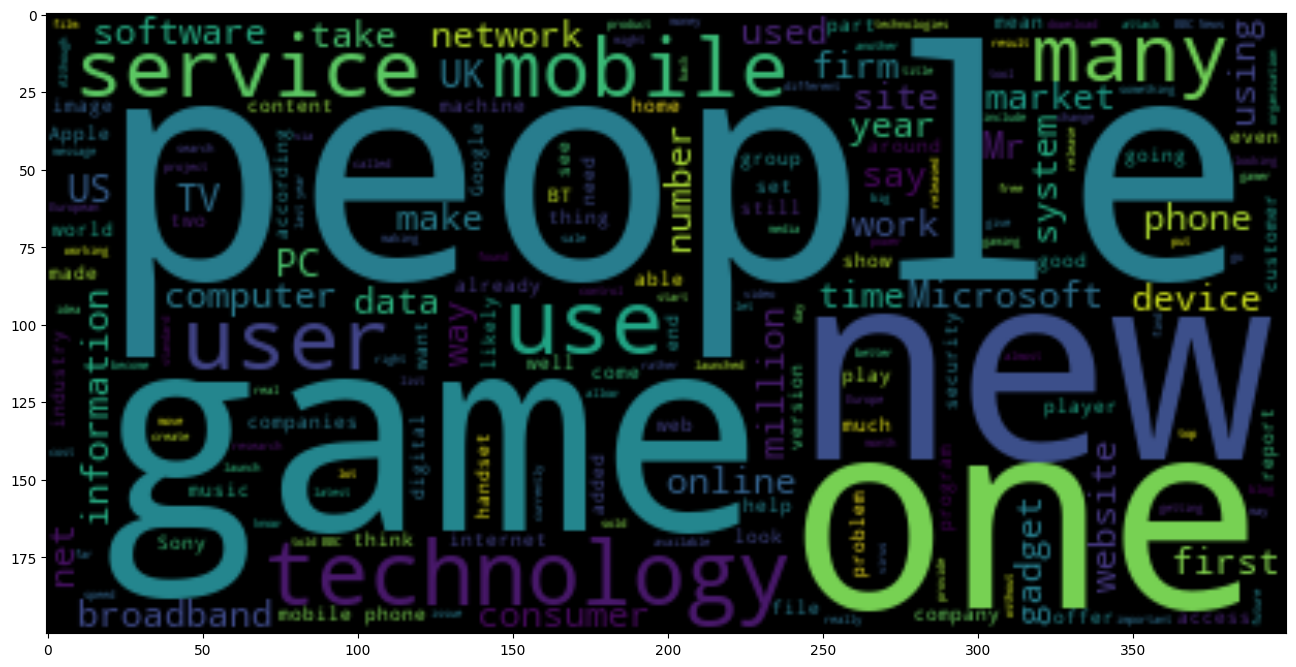

In [39]:
# for cluster zero
new = ' '.join(zero[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
wcloud = WordCloud().generate(' '.join(clean))
plt.figure(figsize=(16,9))
plt.imshow(wcloud, interpolation='bilinear')

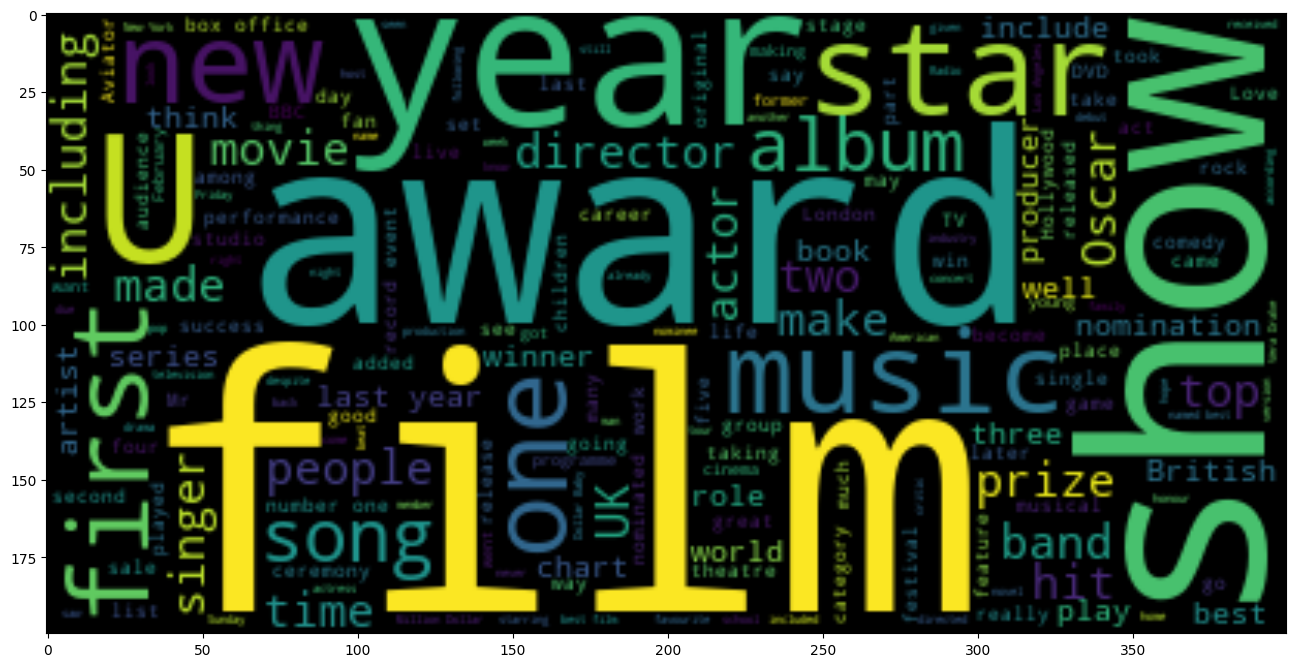

In [40]:
# for cluster one
new = ' '.join(one[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
wcloud = WordCloud().generate(' '.join(clean))
plt.figure(figsize=(16,9))
plt.imshow(wcloud, interpolation='bilinear')

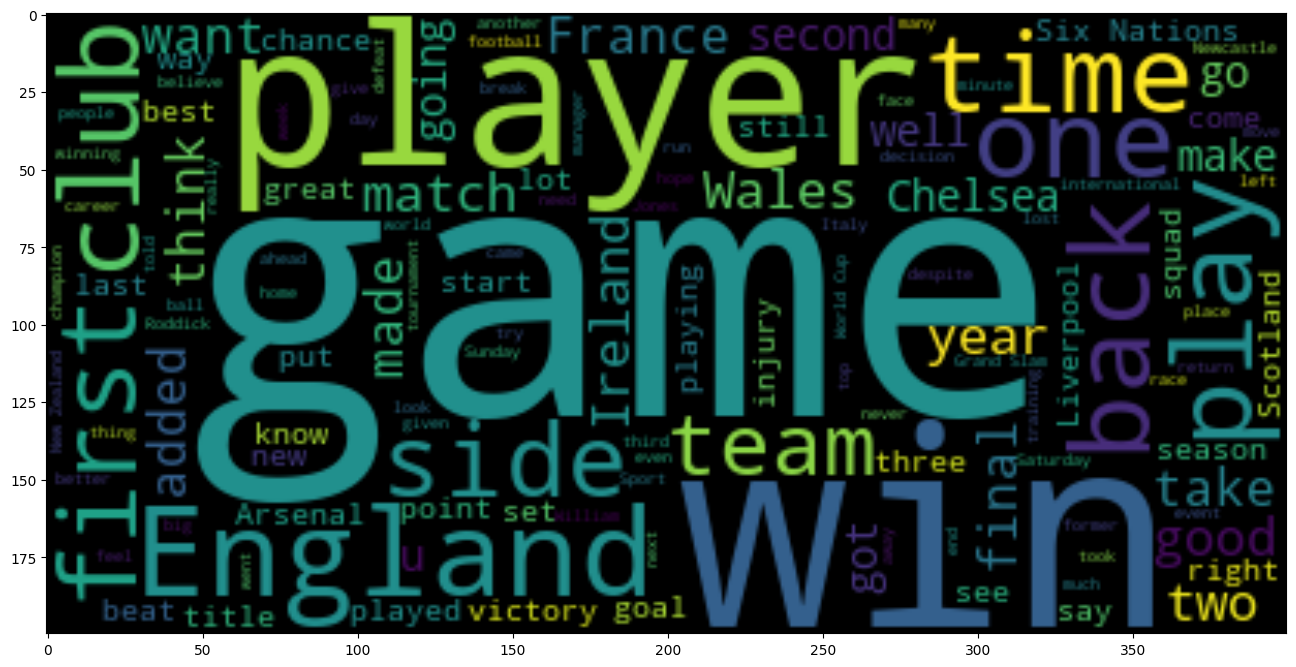

In [41]:
# for cluster two
new = ' '.join(two[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
wcloud = WordCloud().generate(' '.join(clean))
plt.figure(figsize=(16,9))
plt.imshow(wcloud, interpolation='bilinear')

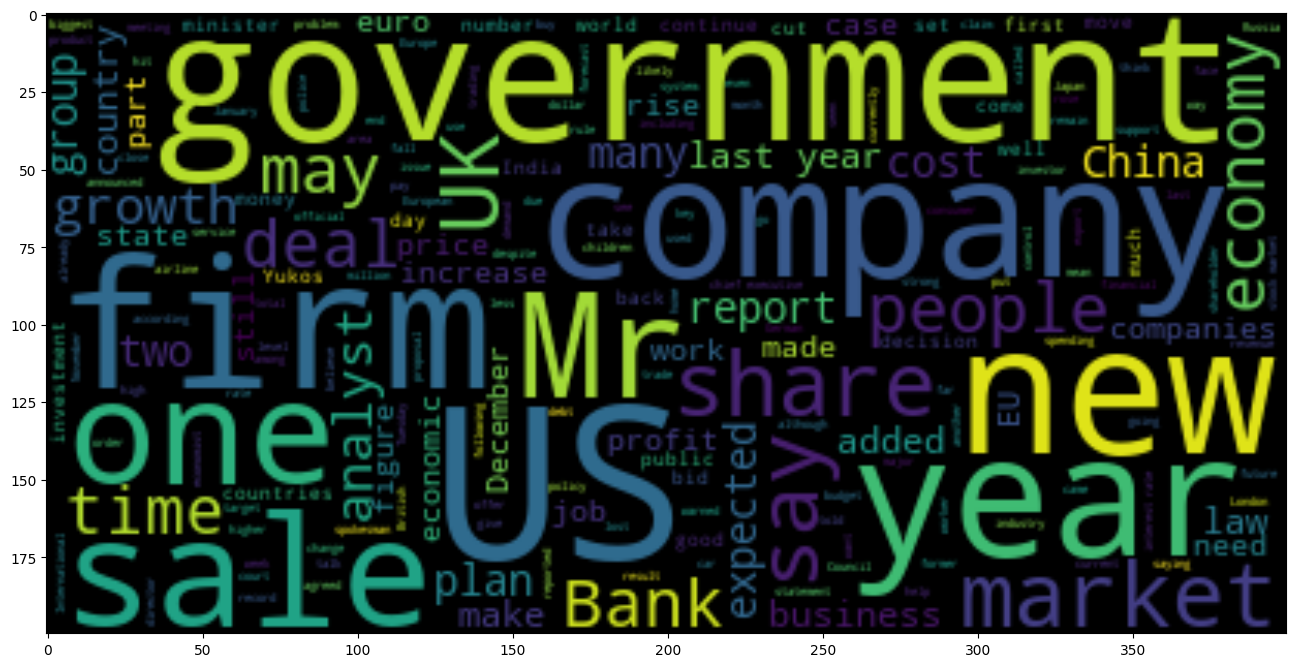

In [42]:
# for cluster three
new = ' '.join(three[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
wcloud = WordCloud().generate(' '.join(clean))
plt.figure(figsize=(16,9))
plt.imshow(wcloud, interpolation='bilinear')

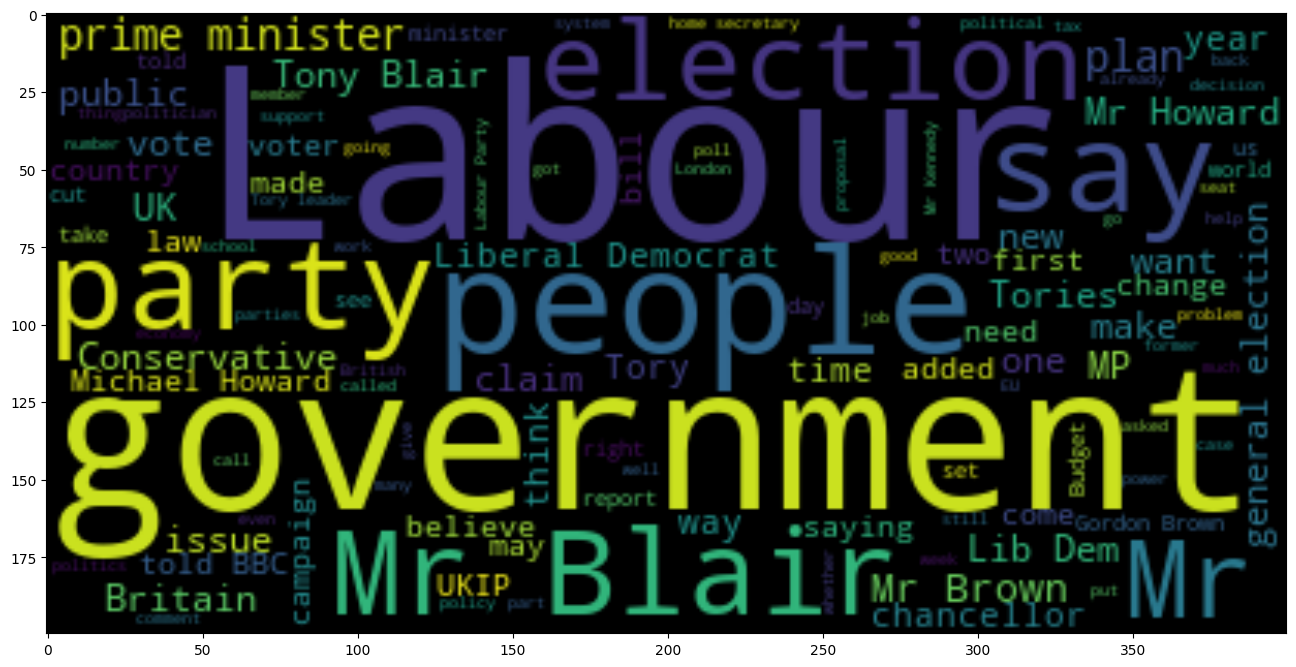

In [43]:
# for cluster four
new = ' '.join(four[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
wcloud = WordCloud().generate(' '.join(clean))
plt.figure(figsize=(16,9))
plt.imshow(wcloud, interpolation='bilinear')